In [5]:
from mapfunctions.graph_functions import init_graph_bbox
import osmnx as ox

G = init_graph_bbox(36.712467,36.718247,-4.478452,-4.471157)

down_edges = []
up_edges = []

for u, v, data in G.edges(data=True):
    if data['osmid'] == 199419587:
        up_edges.append((u, v))
    
    if data['osmid'] == 195495849:
        down_edges.append((u, v))


# Plot to check if we got the correct edges

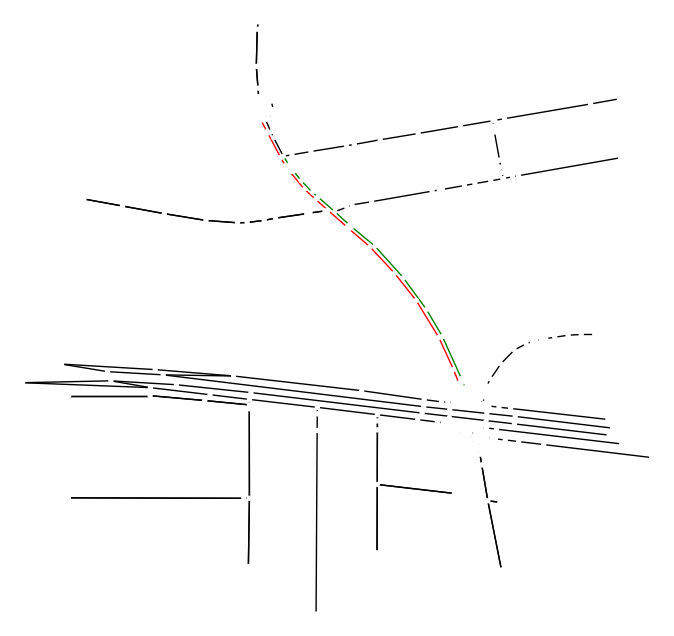

In [3]:
from matplotlib import pyplot as plt

# Define default edge color
edge_color_default = 'black'

# Define special colors for up_edges and down_edges
edge_color_up = 'green'
edge_color_down = 'red'

# Create a dictionary to store edge colors
edge_colors = {}

# Assign the special colors to the categorized edges
for edge in up_edges:
    edge_colors[edge] = edge_color_up

for edge in down_edges:
    edge_colors[edge] = edge_color_down

# Assign the default color to all other edges
for u, v, k in G.edges(keys=True):
    if (u, v) not in edge_colors and (v, u) not in edge_colors:
        edge_colors[(u, v)] = edge_color_default

# Prepare the colors for plotting
edge_color_list = [edge_colors[(u, v)] if (u, v) in edge_colors else edge_colors[(v, u)]
                   for u, v, k in G.edges(keys=True)]

# Define figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the graph with custom edge colors
ox.plot_graph(G, ax=ax, edge_color=edge_color_list, show=False, close=False)

# Show the plot
plt.show()

# Plot to check if the edges are getting the traffic level information

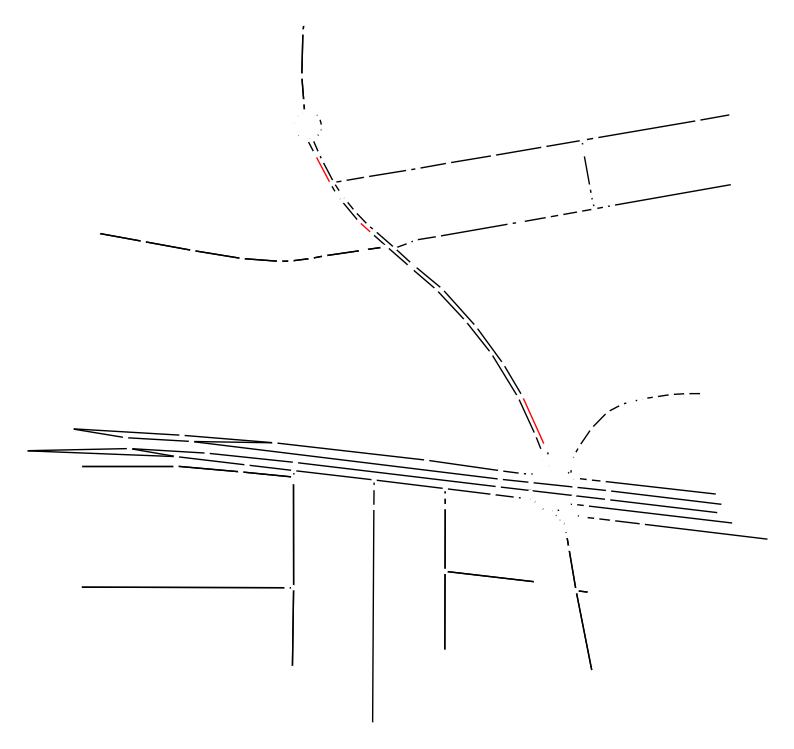

In [8]:
from mapfunctions.graph_functions import add_traffic_level_from_file

filename = '2024_05_14_08_57_19.pbf.json'
with open(f'output_split/mixed/{filename}') as f:
    G = add_traffic_level_from_file(G, f, filename, fill_empty_edges=False)
    
no_traffic_level = []

for u, v, data in G.edges(data=True):
    if (u,v) in up_edges:
        
        # print(data)
        
        if data['dates'][filename]['traffic_level'] is None and data['length'] > 10:
            no_traffic_level.append((u,v))
    
    elif (u,v) in down_edges:
        if data['dates'][filename]['traffic_level'] is None and data['length'] > 10:
            no_traffic_level.append((u,v))
    

            
edge_colors = {}
for edge in no_traffic_level:
    edge_colors[edge] = 'red'

for u, v, k in G.edges(keys=True):
    if (u, v) not in edge_colors and (v, u) not in edge_colors:
        edge_colors[(u, v)] = edge_color_default

edge_color_list = [edge_colors[(u, v)] if (u, v) in edge_colors else edge_colors[(v, u)]
                   for u, v, k in G.edges(keys=True)]

# Define figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the graph with custom edge colors
ox.plot_graph(G, ax=ax, edge_color=edge_color_list, show=False, close=False)

# Show the plot
plt.show()